In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

# load data
data = pd.read_csv('stock_data.csv',index_col=0)
y = data['RET']
X = data.drop('RET',axis=1)

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# print(data.shape)
# data.head()

## Lasso regression (using k-fold cross-validation to tune the shrinkage intensity)

After estimating the lasso regression, now we compare the performance of this method in terms of RMSE in the test set against that of obtained with the standard multiple regression.

In [6]:
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

# Create standard linear regression
ols = LinearRegression().fit(X_train, y_train)
predictions_ols = ols.predict(X_test)
rmse_ols = str(sqrt(mse(y_test,predictions_ols)))

# Create Lasso Regression with model tuning
lasso_tune = Lasso()
grid = dict()
grid['alpha'] = arange(0.00001, 0.01, 0.0001)
search = GridSearchCV(lasso_tune, grid, scoring='neg_mean_squared_error', cv=5, refit=True)
results = search.fit(X_train, y_train)
print('Config: %s' % results.best_params_)
predictions_lasso_tuned = search.predict(X_test)
rmse_tuned = str(sqrt(mse(y_test,predictions_lasso_tuned)))

print('RMSE OLS : ',rmse_ols)
print('RMSE Lasso : ', rmse_tuned)

Config: {'alpha': 0.0018100000000000002}
RMSE OLS :  0.1673482202524616
RMSE Lasso :  0.1610877491464979


In [7]:
from numpy import where
lasso_tuned = Lasso(results.best_params_['alpha'])
lasso_tuned.fit(X_train, y_train)
print(lasso_tuned.coef_)
data.columns[where(lasso_tuned.coef_!=0)]

[ 0.          0.         -0.         -0.         -0.         -0.
  0.          0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.         -0.          0.         -0.         -0.
 -0.         -0.          0.          0.         -0.          0.
 -0.          0.         -0.01516603 -0.         -0.         -0.
  0.          0.01925176 -0.         -0.         -0.         -0.
 -0.         -0.          0.         -0.          0.         -0.
  0.          0.          0.          0.          0.         -0.
 -0.         -0.         -0.          0.         -0.         -0.
 -0.          0.          0.         -0.         -0.         -0.        ]


Index(['cash_lt', 'short_debt'], dtype='object')

## plot the coefficients of the Lasso regression as a function of the shrinkage intensity

Text(0, 0.5, 'coefficients')

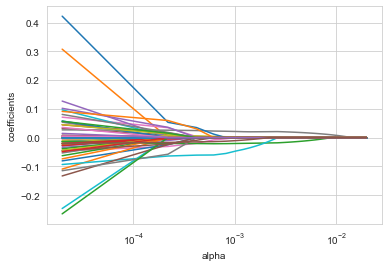

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

alphas = arange(0.00001, 0.01, 0.0001)

lasso = Lasso()
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('coefficients')